In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("//content//drive//MyDrive//log.csv")

In [3]:
df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10
0,87.116.74.253,-,-,[28/Feb/2022:14:04:44,+0200],POST /wp-admin/admin-ajax.php HTTP/2.0,200.0,47,https://nargile.bg/wp-admin/admin.php?page=wc-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...
1,91.196.124.220,-,-,[28/Feb/2022:14:04:47,+0200],POST /wp-cron.php?doing_wp_cron=1646049887.247...,200.0,-,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,WordPress/5.9.1; https://nargile.bg
2,91.196.124.220,-,-,[28/Feb/2022:14:06:45,+0200],POST /wp-cron.php?doing_wp_cron=1646050005.394...,200.0,-,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,WordPress/5.9.1; https://nargile.bg
3,87.116.74.253,-,-,[28/Feb/2022:14:06:44,+0200],POST /wp-admin/admin-ajax.php HTTP/2.0,200.0,47,https://nargile.bg/wp-admin/admin.php?page=wc-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...
4,66.249.70.57,-,-,[28/Feb/2022:14:06:46,+0200],GET /category/alpaca-bowls/ HTTP/1.1,200.0,262929,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...


In [4]:
# Cleaning / Sanitization of data

In [5]:
df.rename(columns={'Column6': 'Method_URL_Code'}, inplace=True)
df[['Method', 'URL Code']] = df['Method_URL_Code'].str.split(' ', 1, expand=True)
df.drop(columns=['Method_URL_Code'], inplace=True)

<ipython-input-5-082ed41ccc36>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Method', 'URL Code']] = df['Method_URL_Code'].str.split(' ', 1, expand=True)


In [6]:
df.rename(columns={"Column1": "ip_add", "Column2": "userid", "Column3": "drop", "Column4": "datetime", "Column5": "combine",
                   "Column7": "status", "Column8": "size", "Column9": "referer", "Column10": "user_agent"}, inplace=True)
df.head()

,ip_add,userid,drop,datetime,combine,status,size,referer,user_agent,Method,URL Code
0,87.116.74.253,-,-,[28/Feb/2022:14:04:44,+0200],200.0,47,https://nargile.bg/wp-admin/admin.php?page=wc-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,POST,/wp-admin/admin-ajax.php HTTP/2.0
1,91.196.124.220,-,-,[28/Feb/2022:14:04:47,+0200],200.0,-,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,WordPress/5.9.1; https://nargile.bg,POST,/wp-cron.php?doing_wp_cron=1646049887.24761605...
2,91.196.124.220,-,-,[28/Feb/2022:14:06:45,+0200],200.0,-,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,WordPress/5.9.1; https://nargile.bg,POST,/wp-cron.php?doing_wp_cron=1646050005.39478302...
3,87.116.74.253,-,-,[28/Feb/2022:14:06:44,+0200],200.0,47,https://nargile.bg/wp-admin/admin.php?page=wc-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,POST,/wp-admin/admin-ajax.php HTTP/2.0
4,66.249.70.57,-,-,[28/Feb/2022:14:06:46,+0200],200.0,262929,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,GET,/category/alpaca-bowls/ HTTP/1.1


In [7]:
df['Datetime'] = df['datetime'] + df['combine']
df.drop(columns=['datetime', 'combine','drop'], inplace=True)

In [8]:
# Final dataset

In [9]:
df.head()

,ip_add,userid,status,size,referer,user_agent,Method,URL Code,Datetime
0,87.116.74.253,-,200.0,47,https://nargile.bg/wp-admin/admin.php?page=wc-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,POST,/wp-admin/admin-ajax.php HTTP/2.0,[28/Feb/2022:14:04:44+0200]
1,91.196.124.220,-,200.0,-,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,WordPress/5.9.1; https://nargile.bg,POST,/wp-cron.php?doing_wp_cron=1646049887.24761605...,[28/Feb/2022:14:04:47+0200]
2,91.196.124.220,-,200.0,-,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,WordPress/5.9.1; https://nargile.bg,POST,/wp-cron.php?doing_wp_cron=1646050005.39478302...,[28/Feb/2022:14:06:45+0200]
3,87.116.74.253,-,200.0,47,https://nargile.bg/wp-admin/admin.php?page=wc-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,POST,/wp-admin/admin-ajax.php HTTP/2.0,[28/Feb/2022:14:06:44+0200]
4,66.249.70.57,-,200.0,262929,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,GET,/category/alpaca-bowls/ HTTP/1.1,[28/Feb/2022:14:06:46+0200]


In [10]:
# Creating GUI

In [11]:
!pip install reportlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.3 MB/s eta 0:00:00


In [33]:
pip install --upgrade matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 53.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
import ipywidgets as widgets
from IPython.display import display, clear_output

In [41]:
from matplotlib.backends.backend_pdf import PdfPages as MatplotlibPdfPages

In [14]:
import matplotlib.backends.backend_pdf as PdfPages

In [15]:
df["Datetime"] = pd.to_datetime(df["Datetime"], format="[%d/%b/%Y:%H:%M:%S%z]")
df["Hour"] = df["Datetime"].dt.hour

Dropdown(description='Select Option:', options=('Select Query', 'Top 10 Hits per Hour', 'Total Hits per Hour',…

Button(description='Get Result', style=ButtonStyle())

Button(description='Generate Report', style=ButtonStyle())

Output()

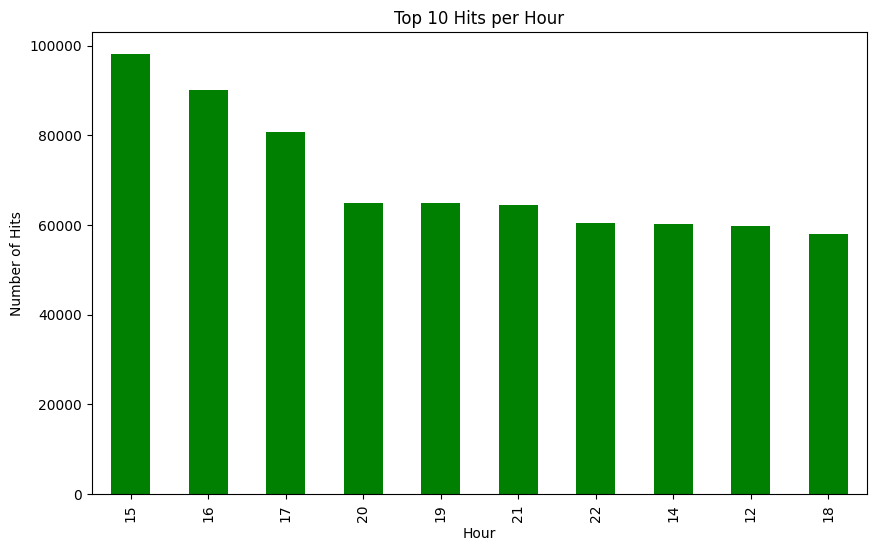

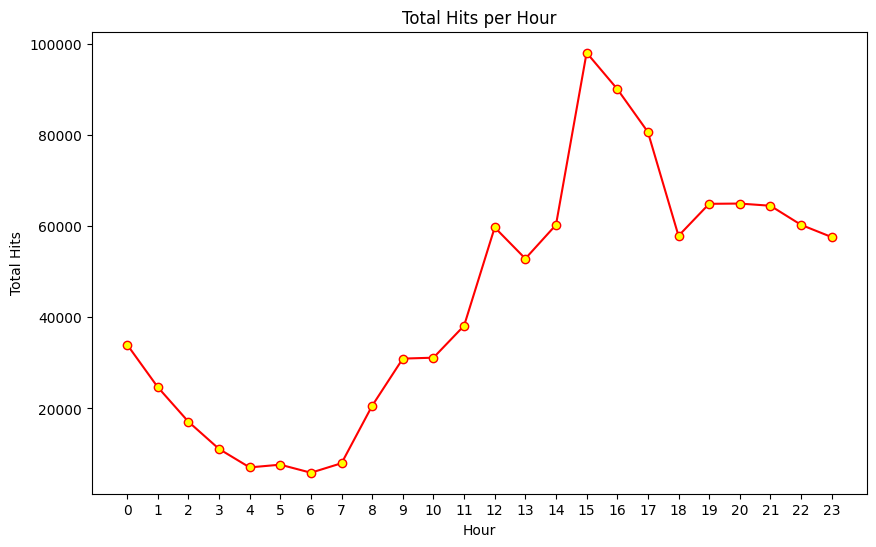

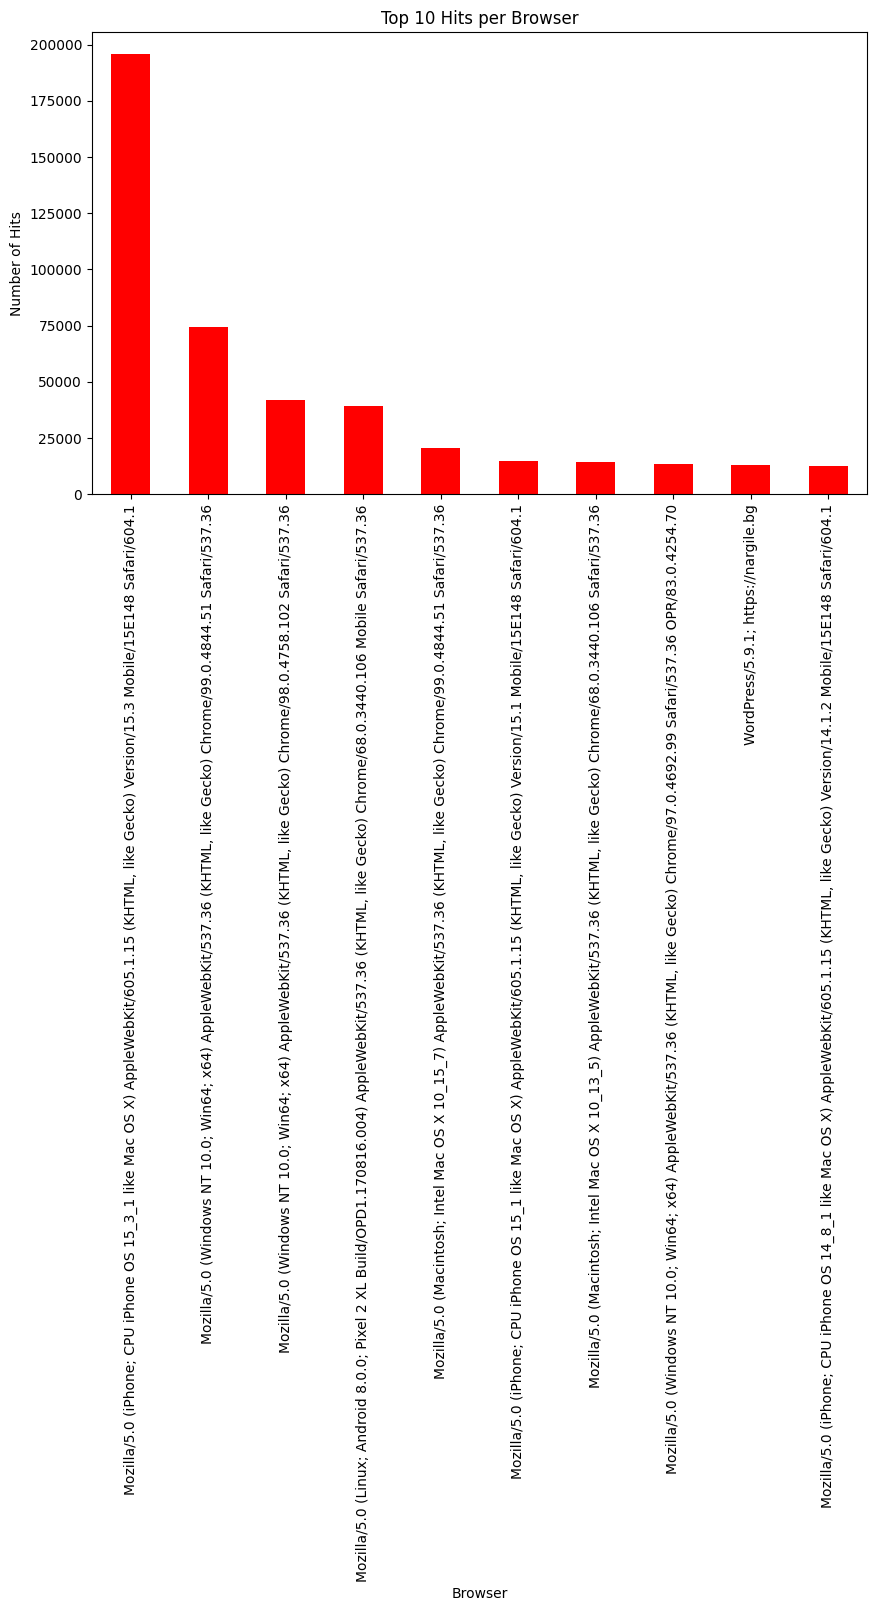

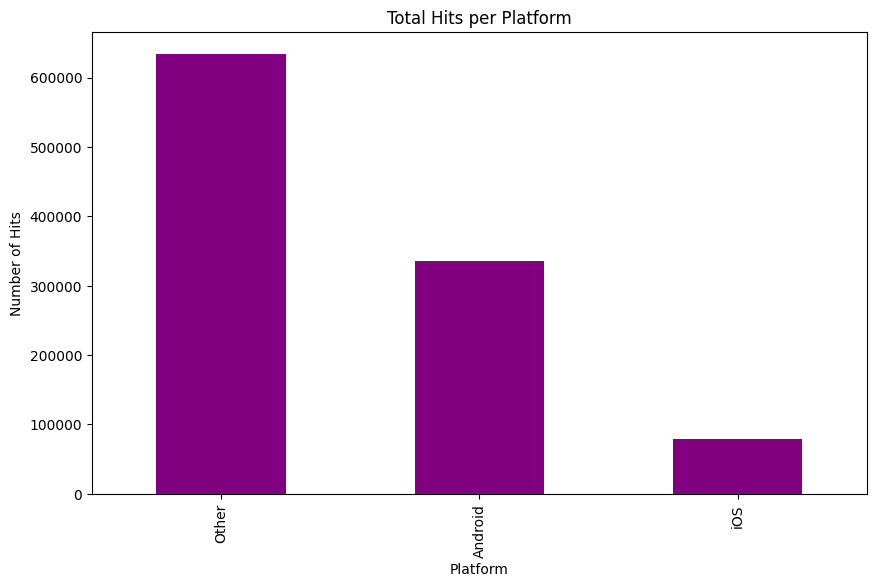

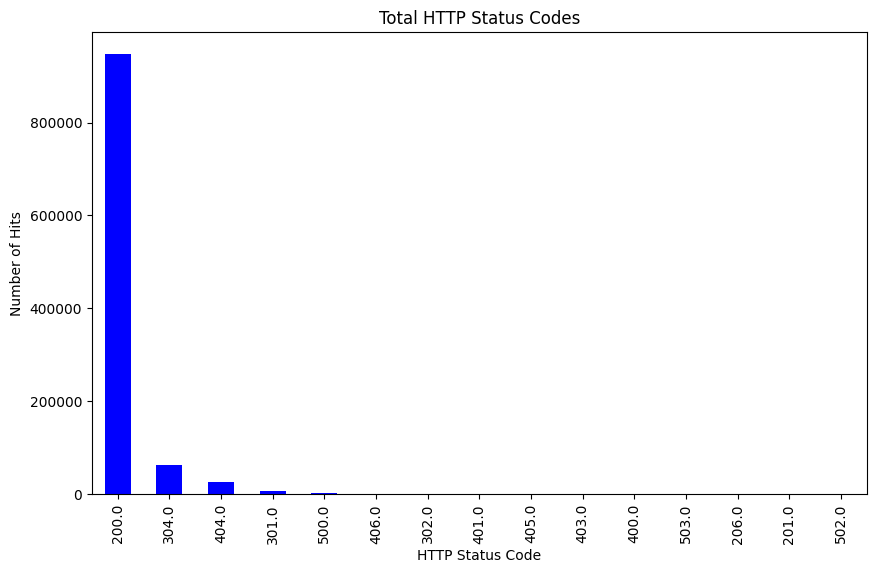

<Figure size 1000x600 with 0 Axes>

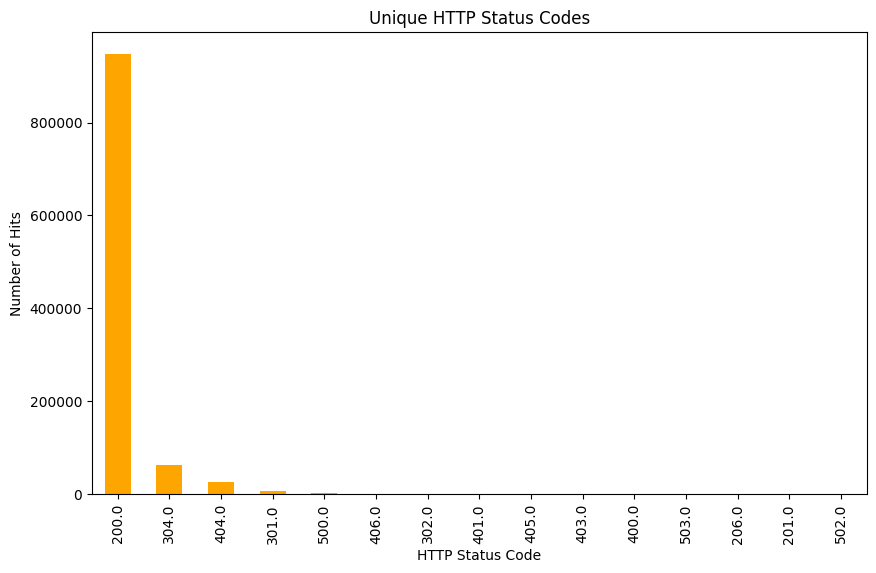

Number of unique HTTP codes are: 15
Report generated successfully as 'Analysis report.pdf'


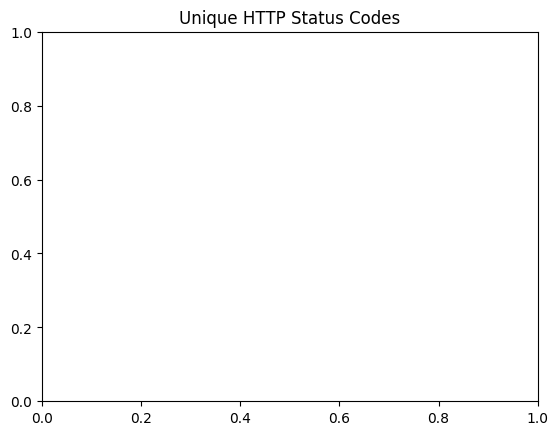

<Figure size 1000x600 with 0 Axes>

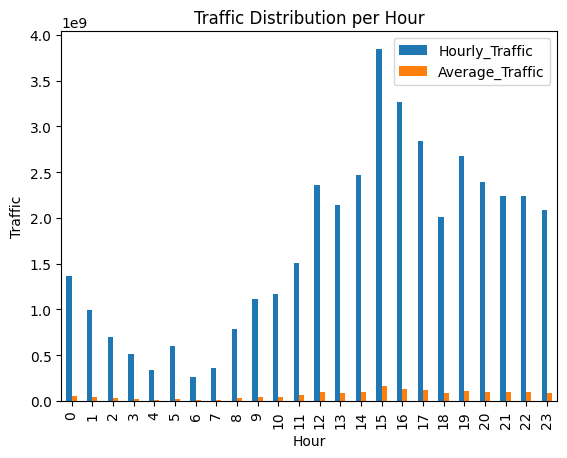

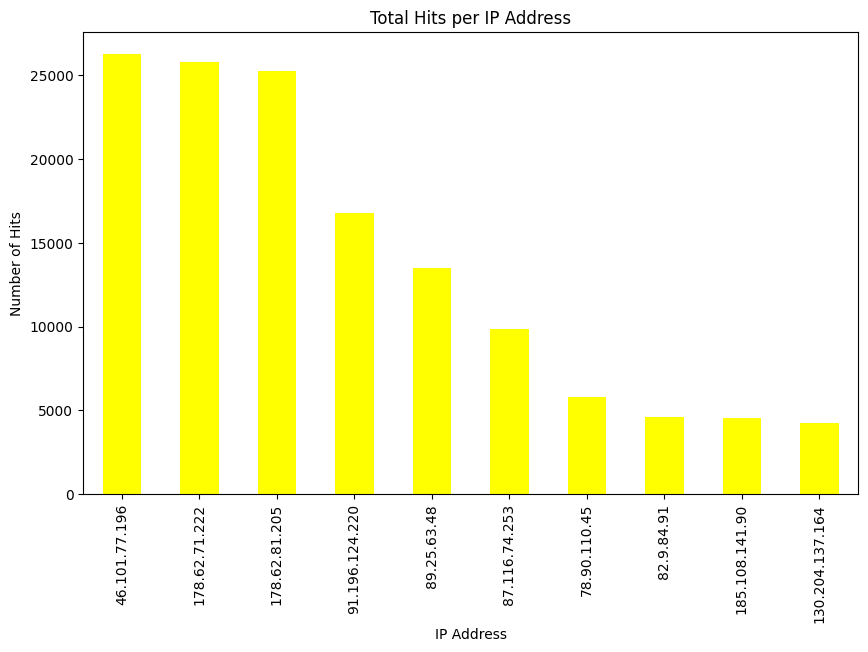

In [44]:
class DataAnalysisApp:
    def __init__(self, dataframe, pdf_pages):
        self.df = dataframe
        self.output = widgets.Output()

        self.query_selector = widgets.Dropdown(
            options=['Select Query',
                     'Top 10 Hits per Hour',
                     'Total Hits per Hour',
                     'Hits per Browser',
                     'Total Hits per Platform',
                     'Total HTTP Status Codes',
                     'Unique HTTP Status Codes',
                     'Traffic Distribution per Hour',
                     'Total Hits per IP'],
            description='Select Option:'
        )
        self.run_button = widgets.Button(description='Get Result')
        self.generate_report_button = widgets.Button(description='Generate Report')

        self.run_button.on_click(self.get_result)
        self.generate_report_button.on_click(self.generate_report)

        self.pdf_pages = pdf_pages

        display(self.query_selector, self.run_button, self.generate_report_button, self.output)

    def get_result(self, _):
        query = self.query_selector.value
        with self.output:
            clear_output()
            if query == 'Top 10 Hits per Hour':
                self.plot_top_10_hits_per_hour()
            elif query == 'Total Hits per Hour':
                self.plot_total_hits_per_hour()
            elif query == 'Hits per Browser':
                self.plot_hits_per_browser()
            elif query == 'Total Hits per Platform':
                self.plot_total_hits_per_platform()
            elif query == 'Total HTTP Status Codes':
                self.plot_total_http_status_codes()
            elif query == 'Unique HTTP Status Codes':
                self.show_unique_http_status_codes()
            elif query == 'Traffic Distribution per Hour':
                self.plot_traffic_distribution_per_hour()
            elif query == 'Total Hits per IP':
                self.plot_total_hits_per_ip()
            else:
                print('Please select a valid query.')

    def generate_report(self, _):
        queries = ['Top 10 Hits per Hour', 'Total Hits per Hour', 'Hits per Browser', 'Total Hits per Platform',
                   'Total HTTP Status Codes', 'Unique HTTP Status Codes', 'Traffic Distribution per Hour',
                   'Total Hits per IP']

        for query in queries:
            self.pdf_pages.savefig(self.plot_query(query))


        # self.pdf_pages.savefig(self.plot_unique_http_status_codes())

        self.pdf_pages.close()
        print("Report generated successfully as 'Analysis report.pdf'")

    def plot_query(self, query):
        plt.figure(figsize=(10, 6))
        if query == 'Top 10 Hits per Hour':
            self.plot_top_10_hits_per_hour()
            plt.title('Top 10 Hits per Hour')
        elif query == 'Total Hits per Hour':
            self.plot_total_hits_per_hour()
            plt.title('Total Hits per Hour')
        elif query == 'Hits per Browser':
            self.plot_hits_per_browser()
            plt.title('Top 10 Hits per Browser')
        elif query == 'Total Hits per Platform':
            self.plot_total_hits_per_platform()
            plt.title('Total Hits per Platform')
        elif query == 'Total HTTP Status Codes':
            self.plot_total_http_status_codes()
            plt.title('Total HTTP Status Codes')
        elif query == 'Unique HTTP Status Codes':
            self.show_unique_http_status_codes()
            plt.title('Unique HTTP Status Codes')
        elif query == 'Traffic Distribution per Hour':
            self.plot_traffic_distribution_per_hour()
            plt.title('Traffic Distribution per Hour')
        elif query == 'Total Hits per IP':
            self.plot_total_hits_per_ip()
            plt.title('Total Hits per IP Address')

        return plt.gcf()

    def plot_top_10_hits_per_hour(self):
        hrhit = self.df.groupby("Hour").size()
        top10 = hrhit.sort_values(ascending=False).head(10)
        top10.plot(kind='bar', color='green')
        plt.xlabel('Hour')
        plt.ylabel('Number of Hits')

    def plot_total_hits_per_hour(self):
        hrhit = self.df.groupby("Hour").size()
        hrhit.plot(kind='line', marker='o', markerfacecolor='yellow', color='red')
        plt.xlabel('Hour')
        plt.ylabel('Total Hits')
        plt.xticks(range(24))

    def plot_hits_per_browser(self):
        hitc = self.df['user_agent'].value_counts()
        top10 = hitc.head(10)
        top10.plot(kind='bar', color='red')
        plt.xlabel('Browser')
        plt.ylabel('Number of Hits')

    def plot_total_hits_per_platform(self):
        self.df["Platform"] = self.df["user_agent"].apply(lambda x: "Android" if "Android" in x
                                               else ("iOS" if "iOS" in x else "Other"))
        phit = self.df["Platform"].value_counts()
        phit.plot(kind='bar', color='purple')
        plt.xlabel('Platform')
        plt.ylabel('Number of Hits')

    def plot_total_http_status_codes(self):
        nhttp = self.df["status"].value_counts()
        nhttp.plot(kind='bar', color='blue')
        plt.xlabel('HTTP Status Code')
        plt.ylabel('Number of Hits')

    def show_unique_http_status_codes(self):
        unique_http_status_counts = self.df["status"].value_counts()


        plt.figure(figsize=(10, 6))
        unique_http_status_counts.plot(kind='bar', color='orange')
        plt.xlabel('HTTP Status Code')
        plt.ylabel('Number of Hits')
        plt.title('Unique HTTP Status Codes')
        plt.show()

        un_nhttp = self.df["status"].nunique()
        print("Number of unique HTTP codes are:", un_nhttp)

    def plot_traffic_distribution_per_hour(self):
        self.df["size"] = pd.to_numeric(self.df["size"], errors="coerce")
        hr_traffic = self.df.groupby(["Hour"])["size"].sum()
        t_hr = self.df["Hour"].nunique()
        avg = hr_traffic / t_hr
        ans = pd.DataFrame({
            "Hourly_Traffic": hr_traffic,
            "Average_Traffic": avg
        })
        ans.plot(kind='bar')
        plt.xlabel('Hour')
        plt.ylabel('Traffic')

    def plot_total_hits_per_ip(self):
        ip_count = self.df['ip_add'].value_counts()
        top10 = ip_count.head(10)
        top10.plot(kind='bar', color='yellow')
        plt.xlabel('IP Address')
        plt.ylabel('Number of Hits')

pdf_pages = MatplotlibPdfPages('Analysis_report.pdf')

app = DataAnalysisApp(df, pdf_pages)

